All data Checking

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
import lasio

<Axes: >

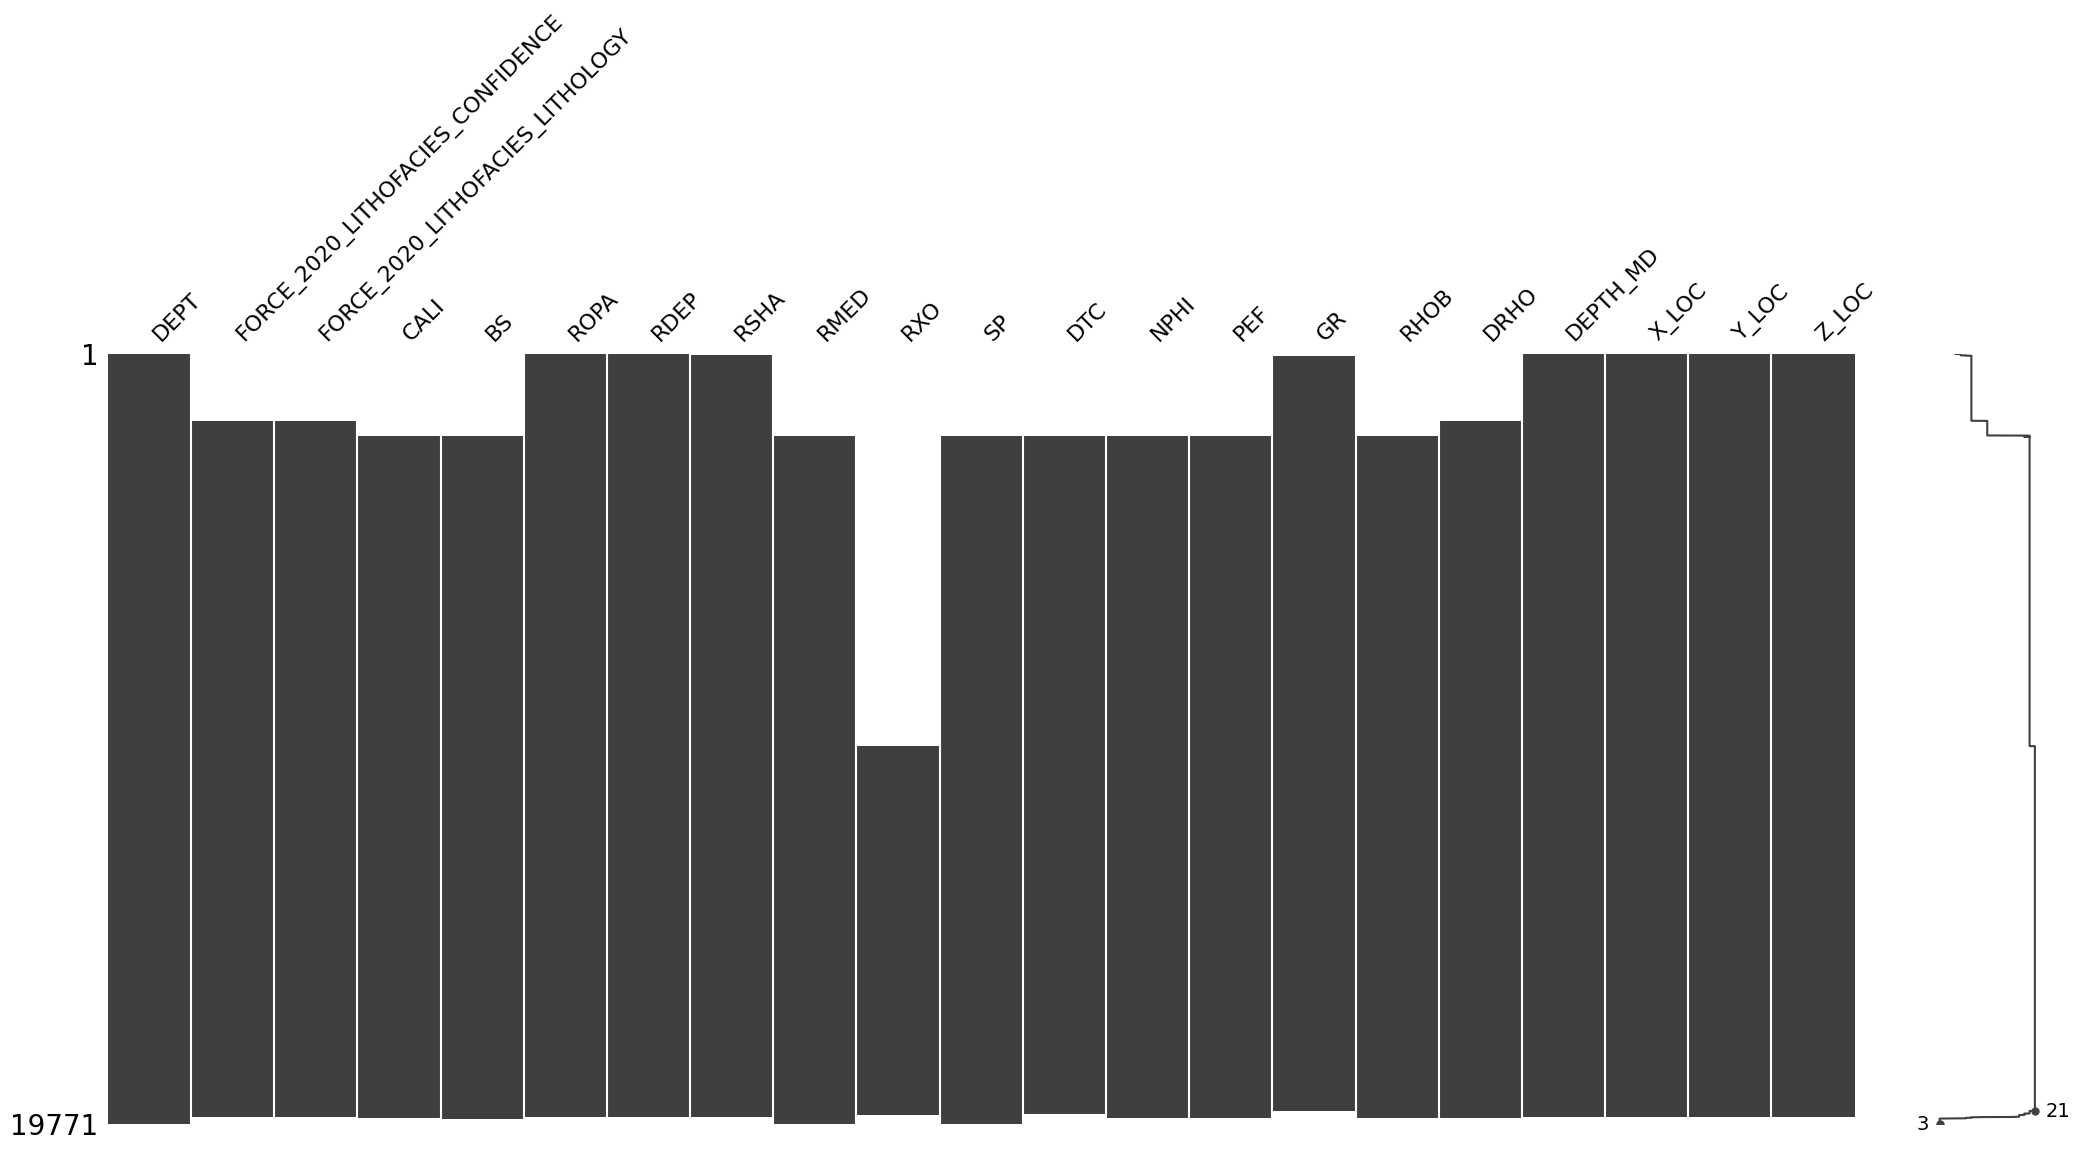

In [63]:
las = lasio.read("E:/DATALGS/33_9-17.las ")
dataframe = las.df() 
dataframe = dataframe.reset_index() 
msno.matrix(dataframe)

In [64]:
color_map = {
    30000: "#ffff00",  # Yellow
    65030: "#ffffe0",  # LightYellow
    65000: "#008b8b",  # DarkCyan
    70032: "#6a5acd",  # SlateBlue
    70000: "#6a5acd",  # SlateBlue
    80000: "#00bfff",  # DeepSkyBlue
    74000: "#00ffff",  # Cyan
    90000: "#000000",  # Black
    99000: "#ff6347",  # Tomato
    70032: "#ffc0cb",  # Pink
    86000: "#ffb6c1",  # Light Magenta
    93000: "#fa8072",  # Salmon
}


lithology_labels = {
    30000: 'Sandstone ',
    65030: 'Silty Sand',
    65000: 'Shale',
    70032: 'Chalk',
    70000: 'Limestone',
    80000: 'Marlstone',
    74000: 'Dolomite',
    90000: 'Coal',
    99000: ' Tuff',
    70032: 'Halite',
    86000: 'Anhydrite',
    93000: 'Basement',
}

data cleaning

              DEPT      RHOB      NPHI         GR         DTC      RDEP   
2094    572.897985  1.773503  0.498529  54.638115  146.751511  1.366876  \
2095    573.049985  1.796526  0.482996  54.692352  128.101181  1.332967   
2096    573.201985  1.812042  0.480000  59.707588  136.148621  1.298060   
2097    573.353985  1.846628  0.463102  60.435368  144.943619  1.260165   
2098    573.505985  1.881826  0.476845  60.801056  157.991302  1.220263   
...            ...       ...       ...        ...         ...       ...   
19430  3207.969985  2.297123  0.216473  62.433578   85.182129  1.497030   
19431  3208.121985  2.315043  0.206502  62.497101   85.280190  1.505995   
19432  3208.273985  2.326540  0.200000  61.952362   84.222763  1.529932   
19433  3208.425985  2.329488  0.200000  61.902107   83.424568  1.568802   
19434  3208.577985  2.321023  0.200000  60.470398   83.139427  1.612678   

       FORCE_2020_LITHOFACIES_LITHOLOGY  
2094                            65000.0  
2095           

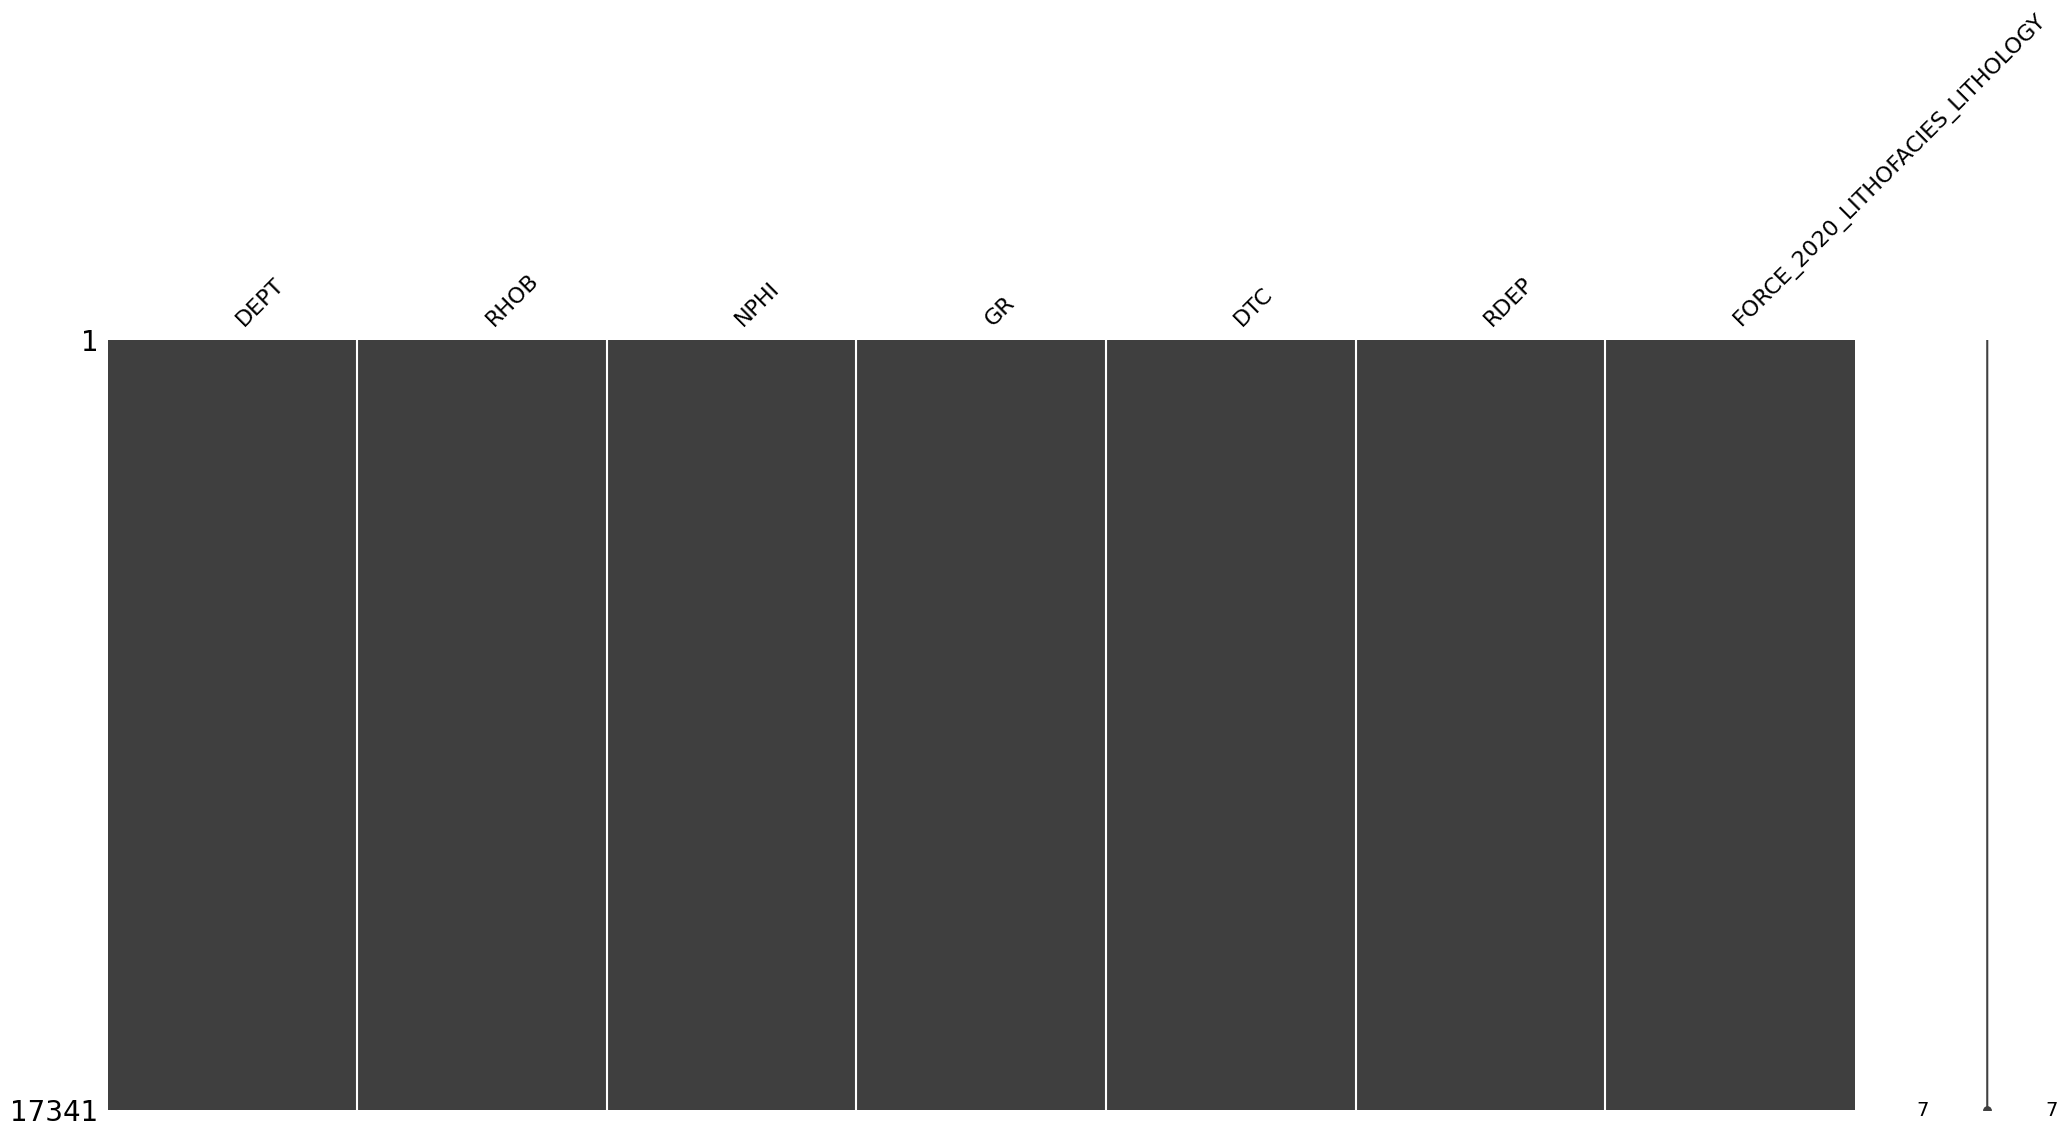

In [65]:
selected_cols = ['DEPT', 'RHOB', 'NPHI', 'GR', 'DTC', 'RDEP', 'FORCE_2020_LITHOFACIES_LITHOLOGY']
selected_dataframe = dataframe[selected_cols]
DropDataVal = selected_dataframe.dropna()
msno.matrix(DropDataVal)
print(DropDataVal)

Data set  Visualization

C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_17808\2907918539.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=list(range(len(color_map))), aspect=60, pad=0.05, extend='neither')


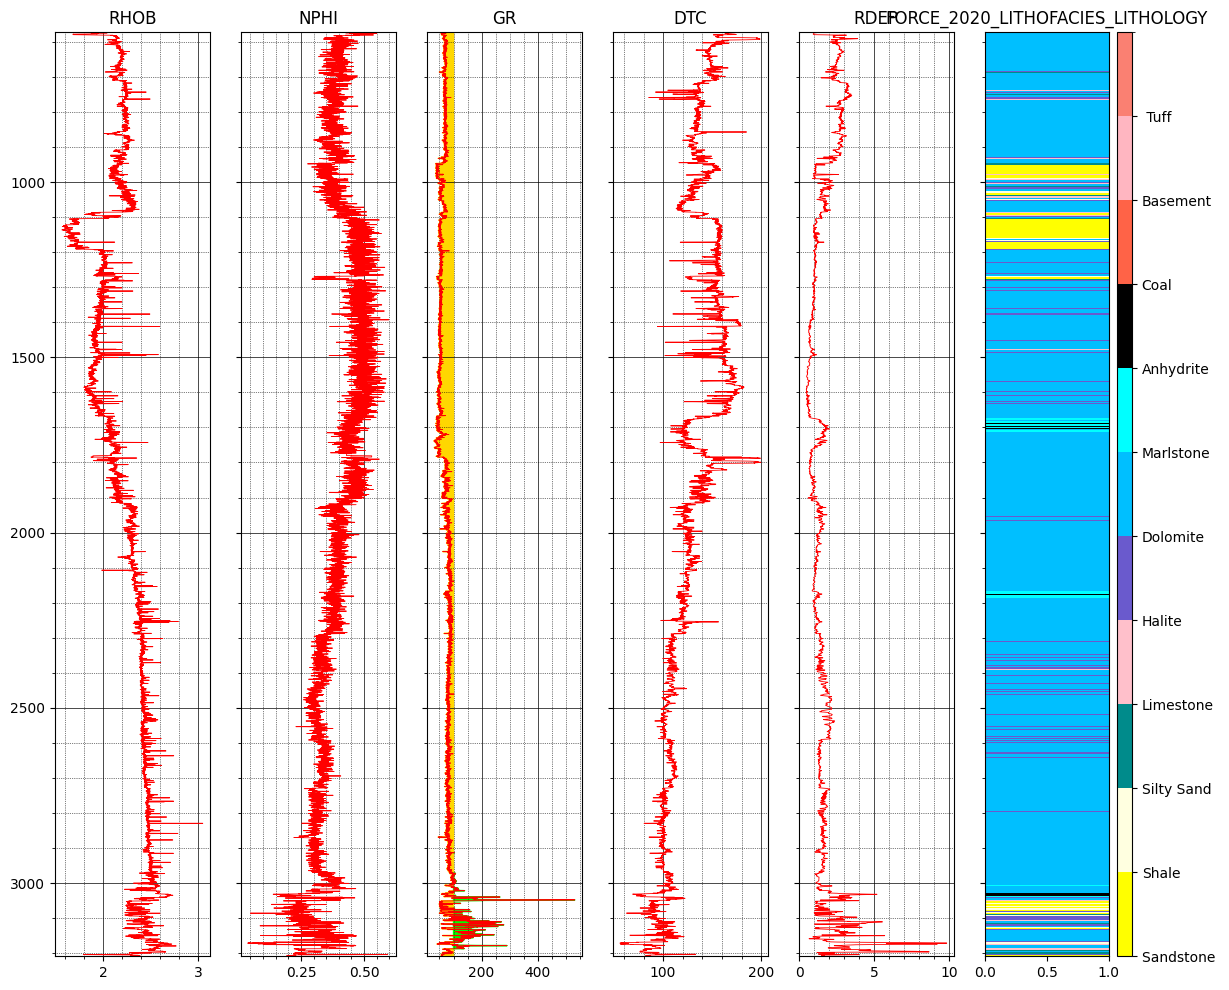

In [66]:
import matplotlib.colors as mcolors
data = DropDataVal[['DEPT', 'RHOB', 'NPHI', 'GR', 'DTC', 'RDEP', 'FORCE_2020_LITHOFACIES_LITHOLOGY']]
data = data.values
mnemonics = ['RHOB', 'NPHI', 'GR', 'DTC', 'RDEP', 'FORCE_2020_LITHOFACIES_LITHOLOGY']
rows, cols = 1, 6
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(14,12), sharey=True)

cmap = mcolors.ListedColormap(list(color_map.values()))
norm = mcolors.BoundaryNorm(list(range(len(color_map) + 1)), cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=list(range(len(color_map))), aspect=60, pad=0.05, extend='neither')
cbar.ax.set_yticklabels(list(color_map.keys()))

for i in range(cols):
    if i < cols -1:
        ax[i].plot(data[:,i+1],data[:,0],'r', linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='black')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
        ax[i].set_title('%s' %mnemonics[i])
        
    elif i ==cols -1:
        F = np.vstack((data[:, -1], data[:, -1])).T
        m = ax[i].imshow(F, aspect='auto', cmap=cmap, extent=[0, 1, max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mnemonics[i ])

cl = 100
y2 = data[:, 3]
below_threshold = y2 < cl
above_threshold = y2 >= cl
ax[2].fill_betweenx(data[:, 0], cl, y2, where=below_threshold, color='gold')
ax[2].fill_betweenx(data[:, 0], cl, y2, where=above_threshold, color='lime')


cbar.ax.set_yticklabels([lithology_labels[key] for key in sorted(color_map.keys())])

plt.show()